# 4
The following elementary reaction:
$$A+B \to C $$
has a rate constant of 0.1 $l.mol^{-1}hr^{-1}$ and an equimolar initial feed of 5 mol/l of A and 5 mol/l of B.

    a) Use Python to obtain the time required to convert 30% of A. [51.4 min]
    b) If the initial concentration of A stays 5 mol/l and the initial concentration of B becomes 7.5 mol/l, how long does it take to convert 30% of A? [32 min]

In [1]:
# given: elementary rxn so we know it's 1st order
# rate constant units [L/mol.hour], so we know it is volumetric and not catalysed
# Reaction not at SS because asked time to 30% conversion
    #so assume it's a batch reaction with equations that go along with it



In [35]:
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from numpy import linspace, log
% matplotlib inline

In [21]:
CAo = 5 # mol/L
CBo = 5 # mol/L
CCo = 0 # mol/L
R = 8.314 # J/Kmol.K
V = 1 # L assume constant volume batch
NAo = CAo*V
NBo = CBo*V
NCo = CCo*V
k = 0.1/60 # L/mol.min

a) Use Python to obtain the time required to convert 30% of A. [51.4 min]

In [5]:
# ra = rb = -kCACB  [mol/L.hr] as a first order reaction
# dNAdt = raV = -kCA*CB*V 
# CA=CB= NA/V
# dNAdt = -k(NA**2)/V
# (-1/NA) - (-1/NAo) =-kt/V 


In [24]:
NA = 0.7*NAo
NA

3.5

In [25]:
t = ((1/NA)-(1/NAo))*V/k
t #time in mins

51.42857142857141

b) If the initial concentration of A stays 5 mol/l and the initial concentration of B becomes 7.5 mol/l, how long does it take to convert 30% of A? [32 min]

In [28]:
CAo = 5 # mol/L
CBo = 7.5 # mol/L
CCo = 0 # mol/L
R = 8.314 # J/Kmol.K
V = 1 # L assume constant volume batch
NAo = CAo*V
NBo = CBo*V
NCo = CCo*V
k = 0.1/60 # L/mol.min

In [29]:
NA = 0.7*NAo
NA

3.5

In [31]:
NB = NBo - 0.3*NAo
NB

6.0

In [33]:
#dNA/dt = -k*NA*NB/V 
#ln(NA/NAo) = -K*NB*t

In [37]:
t = (log(NA/NAo))/(-k*NB)
t

35.667494393873241

In [38]:
# draw

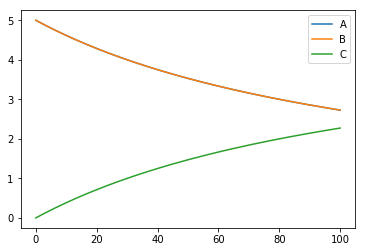

In [57]:
k = 0.1/60 # L/mol.min
CAo = 5
CBo = 5
CCo = 0
V = 1 #L
NAo = CAo*V
NBo = CBo*V
NCo = CCo*V
def ri(var):
    NA, NB, NC = var
    
    rA = -k*(NA/V)*(NB/V)
    rB = rA
    rC = -rA
        
    return [rA, rB, rC]

def diffs(var, t):
    NA, NB, NC = var
    [rA, rB, rC] = ri(var)
    
    dNAdt = rA*V
    dNBdt = rB*V
    dNCdt = rC*V
     
    return [dNAdt, dNBdt, dNCdt]
tspan = linspace(0, 100, 1000)
var = odeint(diffs, [NAo, NBo, NC0], tspan)
    
plt.plot(tspan, var)
plt.legend(['A', 'B', 'C'])
